main_genre_Dementia        -1.110283
main_genre_Vampire         -0.951426
main_genre_Samurai         -0.799157
main_genre_Unknown         -0.691421
main_genre_Drama            0.583689
main_genre_Mystery          0.559625
main_genre_Kids            -0.528832
type_ONA                   -0.522591
main_genre_Adventure        0.464157
main_genre_School           0.444129
main_genre_Yaoi            -0.442299
main_genre_Action           0.440863
main_genre_Harem            0.420007
main_genre_Shounen          0.408244
main_genre_Supernatural    -0.396730
main_genre_Romance          0.390489
main_genre_Psychological   -0.381038
type_Music                 -0.369236
type_TV                     0.368374
main_genre_Josei            0.365225
dtype: float64


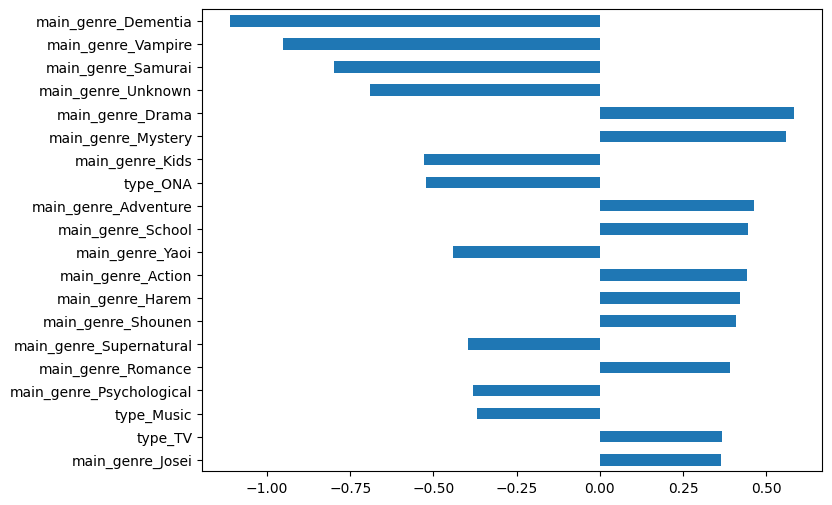

In [2]:
# 4_feature_importance.ipynb cell
from pathlib import Path
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder

ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
MODELS = ROOT / "models"
PROC = ROOT / "data" / "processed"

model = joblib.load(MODELS / "ridge_baseline.joblib")
pre = model.named_steps["pre"]
reg = model.named_steps["reg"]

# numeric feature names
num_feats = pre.transformers_[0][2]
cat_transformer = pre.transformers_[1][1].named_steps["onehot"]
cat_feats = pre.transformers_[1][2]

# build full feature names
cat_names = cat_transformer.get_feature_names_out(cat_feats).tolist()
feature_names = list(num_feats) + cat_names

coefs = reg.coef_
imp = pd.Series(coefs, index=feature_names).sort_values(key=abs, ascending=False).head(20)
print(imp)
imp.plot(kind="barh", figsize=(8,6)).invert_yaxis()
